# Análisis

- El siguiente análisis, permite predecir que clientes van a caer en mora con sus tarjetas de crédito. Desde un punto de vista del negocio esto es un acierto predececir que clientes van a caer en mora ya que se pueden evitar gastos de cobranza o ofrecer planaes de refinanciamento.
- Se ha propuesto una estructura de MLOps para realizar la prediccion y mandar a producción, es de suma importancia que estos análisis, predicciones y modelos no se queden en un solo notebook. Si no vaya a producción y se pueda dar el uso adecuado del modelo o análisis. 

In [9]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Librerias

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
import sys
sys.path.append('../src/data')
from clean_data import Clean_data 

# Datos

## Carga de Datos

In [16]:
data_raw=pd.read_csv("../data/raw/BasePruebaAval.txt", delimiter='\t')

In [45]:
data_raw.head()

,CODIGO_ID,Fecha,MarcaMora_Tarjeta,ORIGEN_APROBACION,FORMA_PAGO,SALDO_TOTAL_TARJETA,CUPO_PROMEDIO_TARJETA,SALDO_UTILIZ_PROM_CLIENTE,CANTIDAD_TOTAL_AVANCES,ANTIGUEDAD_TARJETA_ANIOS,...,MARCA_CUENTA_CORRIENTE,MARCA_CUENTA_AHORROS,RIESGO_CLIENTE_TOTAL_GFP,VALOR_DEPOSITO_A_PLAZO,SEGMENTO_RIESGO,SUCURSAL,EDAD,GENERO,INSTRUCCION,NUM_TC_SIST_FIM
0,1,2018-01-29,0,Proactivo,No,1108.50,1400.0,1279.7483,0,10,...,No,No,1125.33,0.0,E,QUITO,27,FEM,PRI,1
1,2,2018-01-25,0,Demanda,No,601.56,3000.0,16.9700,0,7,...,Si,Si,601.56,0.0,A,QUITO,37,MAS,UNI,0
2,3,2018-01-21,0,Demanda,No,25.26,800.0,36.2250,0,7,...,Si,Si,25.26,0.0,A,QUITO,46,MAS,SEC,4
3,4,2018-01-17,0,Proactivo,No,12996.65,15600.0,17592.0050,0,7,...,Si,Si,16228.69,0.0,B,AMBATO,40,MAS,UNI,2
4,5,2018-01-08,0,Proactivo,No,173.70,4800.0,574.2883,0,10,...,No,No,173.70,0.0,A,QUITO,29,MAS,UNI,2


In [46]:
len(data_raw)

22965

## Información del conjunto de Datos

In [47]:
# Tipos de Datos
data_raw.dtypes

CODIGO_ID                                 int64
Fecha                                    object
MarcaMora_Tarjeta                         int64
ORIGEN_APROBACION                        object
FORMA_PAGO                               object
SALDO_TOTAL_TARJETA                     float64
CUPO_PROMEDIO_TARJETA                   float64
SALDO_UTILIZ_PROM_CLIENTE               float64
CANTIDAD_TOTAL_AVANCES                    int64
ANTIGUEDAD_TARJETA_ANIOS                  int64
PROMEDIO_MENSUAL_CONSUMOS_LOCALES       float64
MAXIMO_NUM_DIAS_VENCIDO                   int64
NUMERO_OPERACIONES_TITULAR                int64
PROMEDIO_DIAS_SOBREGIRO_CC                int64
PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO    float64
MARCA_CUENTA_CORRIENTE                   object
MARCA_CUENTA_AHORROS                     object
RIESGO_CLIENTE_TOTAL_GFP                float64
VALOR_DEPOSITO_A_PLAZO                  float64
SEGMENTO_RIESGO                          object
SUCURSAL                                

- Existen columnas que no están con su tipo de dato adecuado
- Es necesario cambiar los "Si" por 1 y los "No" por 0

In [48]:
data_raw.isnull().sum()

CODIGO_ID                               0
Fecha                                   0
MarcaMora_Tarjeta                       0
ORIGEN_APROBACION                       0
FORMA_PAGO                              0
SALDO_TOTAL_TARJETA                     0
CUPO_PROMEDIO_TARJETA                   0
SALDO_UTILIZ_PROM_CLIENTE               0
CANTIDAD_TOTAL_AVANCES                  0
ANTIGUEDAD_TARJETA_ANIOS                0
PROMEDIO_MENSUAL_CONSUMOS_LOCALES       0
MAXIMO_NUM_DIAS_VENCIDO                 0
NUMERO_OPERACIONES_TITULAR              0
PROMEDIO_DIAS_SOBREGIRO_CC              0
PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO    0
MARCA_CUENTA_CORRIENTE                  0
MARCA_CUENTA_AHORROS                    0
RIESGO_CLIENTE_TOTAL_GFP                0
VALOR_DEPOSITO_A_PLAZO                  0
SEGMENTO_RIESGO                         0
SUCURSAL                                0
EDAD                                    0
GENERO                                  0
INSTRUCCION                       

- No existen datos faltantes

In [49]:
data_raw.duplicated().sum()

0

- No existen datos duplicados

## Limpieza de la data

In [50]:
# Llamamos a las clases creadas en el script src/data/clean_data.py
# Cambiamos el tipo de datos y reemplazmaos si por 1 y no por 0
data_limpia=Clean_data(data_raw)
data_limpia.change_type_date('Fecha')
data_limpia.change_type_float('CANTIDAD_TOTAL_AVANCES')
data_limpia.change_type_float('ANTIGUEDAD_TARJETA_ANIOS')
data_limpia.change_type_float('MAXIMO_NUM_DIAS_VENCIDO')
data_limpia.change_type_float('NUMERO_OPERACIONES_TITULAR')
data_limpia.change_type_float('PROMEDIO_DIAS_SOBREGIRO_CC')
data_limpia.change_type_float('EDAD')
data_limpia.change_type_float('NUM_TC_SIST_FIM')
data_limpia.change_yes_no('FORMA_PAGO')
data_limpia.change_yes_no('MARCA_CUENTA_CORRIENTE')
data_limpia.change_yes_no('MARCA_CUENTA_AHORROS')
data_limpia=data_limpia.df


In [10]:
data_limpia.dtypes

CODIGO_ID                                        int64
Fecha                                   datetime64[ns]
MarcaMora_Tarjeta                                int64
ORIGEN_APROBACION                               object
FORMA_PAGO                                       int64
SALDO_TOTAL_TARJETA                            float64
CUPO_PROMEDIO_TARJETA                          float64
SALDO_UTILIZ_PROM_CLIENTE                      float64
CANTIDAD_TOTAL_AVANCES                         float64
ANTIGUEDAD_TARJETA_ANIOS                       float64
PROMEDIO_MENSUAL_CONSUMOS_LOCALES              float64
MAXIMO_NUM_DIAS_VENCIDO                        float64
NUMERO_OPERACIONES_TITULAR                     float64
PROMEDIO_DIAS_SOBREGIRO_CC                     float64
PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO           float64
MARCA_CUENTA_CORRIENTE                           int64
MARCA_CUENTA_AHORROS                             int64
RIESGO_CLIENTE_TOTAL_GFP                       float64
VALOR_DEPO

In [11]:
data_limpia.head()

,CODIGO_ID,Fecha,MarcaMora_Tarjeta,ORIGEN_APROBACION,FORMA_PAGO,SALDO_TOTAL_TARJETA,CUPO_PROMEDIO_TARJETA,SALDO_UTILIZ_PROM_CLIENTE,CANTIDAD_TOTAL_AVANCES,ANTIGUEDAD_TARJETA_ANIOS,...,MARCA_CUENTA_CORRIENTE,MARCA_CUENTA_AHORROS,RIESGO_CLIENTE_TOTAL_GFP,VALOR_DEPOSITO_A_PLAZO,SEGMENTO_RIESGO,SUCURSAL,EDAD,GENERO,INSTRUCCION,NUM_TC_SIST_FIM
0,1,2018-01-29,0,Proactivo,0,1108.50,1400.0,1279.7483,0.0,10.0,...,0,0,1125.33,0.0,E,QUITO,27.0,FEM,PRI,1.0
1,2,2018-01-25,0,Demanda,0,601.56,3000.0,16.9700,0.0,7.0,...,1,1,601.56,0.0,A,QUITO,37.0,MAS,UNI,0.0
2,3,2018-01-21,0,Demanda,0,25.26,800.0,36.2250,0.0,7.0,...,1,1,25.26,0.0,A,QUITO,46.0,MAS,SEC,4.0
3,4,2018-01-17,0,Proactivo,0,12996.65,15600.0,17592.0050,0.0,7.0,...,1,1,16228.69,0.0,B,AMBATO,40.0,MAS,UNI,2.0
4,5,2018-01-08,0,Proactivo,0,173.70,4800.0,574.2883,0.0,10.0,...,0,0,173.70,0.0,A,QUITO,29.0,MAS,UNI,2.0


# Análisis descriptivo

-Realizamos un análisis descriptivo de las variables que tenemos 

In [12]:
col_num=data_limpia.select_dtypes(include='float').columns.tolist()
col_cat=data_limpia.select_dtypes(include=['object','int']).columns.tolist()

In [13]:
eda_num=data_limpia[col_num]

In [14]:
eda_num.describe()

,SALDO_TOTAL_TARJETA,CUPO_PROMEDIO_TARJETA,SALDO_UTILIZ_PROM_CLIENTE,CANTIDAD_TOTAL_AVANCES,ANTIGUEDAD_TARJETA_ANIOS,PROMEDIO_MENSUAL_CONSUMOS_LOCALES,MAXIMO_NUM_DIAS_VENCIDO,NUMERO_OPERACIONES_TITULAR,PROMEDIO_DIAS_SOBREGIRO_CC,PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO,RIESGO_CLIENTE_TOTAL_GFP,VALOR_DEPOSITO_A_PLAZO,EDAD,NUM_TC_SIST_FIM
count,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,22965.000000,2.296500e+04,2.296500e+04,22965.000000,22965.000000
mean,1542.396559,2813.667412,1311.204792,1.062182,4.246941,198.391947,10.856521,3.144742,0.621250,2675.061859,4.349611e+03,1.765374e+03,36.409580,2.495537
std,1767.039904,3109.571437,1574.220788,2.842780,3.376937,629.200595,14.291148,1.710227,3.687754,17073.421169,2.152485e+04,2.889541e+04,8.073192,1.703107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58423.352800,0.000000e+00,0.000000e+00,23.000000,0.000000
25%,459.710000,900.000000,339.443300,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.229400e+02,0.000000e+00,29.000000,1.000000
50%,1010.230000,2166.666600,850.363300,0.000000,3.000000,42.560000,4.000000,3.000000,0.000000,81.808600,1.231960e+03,0.000000e+00,36.000000,3.000000
75%,2050.490000,3000.000000,1815.668300,0.000000,7.000000,189.290000,19.000000,4.000000,0.000000,807.844900,2.591450e+03,0.000000e+00,43.000000,4.000000
max,45392.780000,50000.000000,32850.076600,79.000000,12.000000,35956.000000,87.000000,13.000000,221.000000,873976.028400,1.715176e+06,2.281686e+06,50.000000,5.000000


- Estamos con una muestra de personas entre 23 a 50 años.
- Los individuso cuentan entre 0 y 5 tarjetas de crédito.
- El PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO y SALDO_TOTAL_TARJETA tiene un rango de datos muy grande a compración con los demás valores. 

In [15]:
len(col_num)

14

Text(0.5, 0.98, 'Distribución variables numéricas')

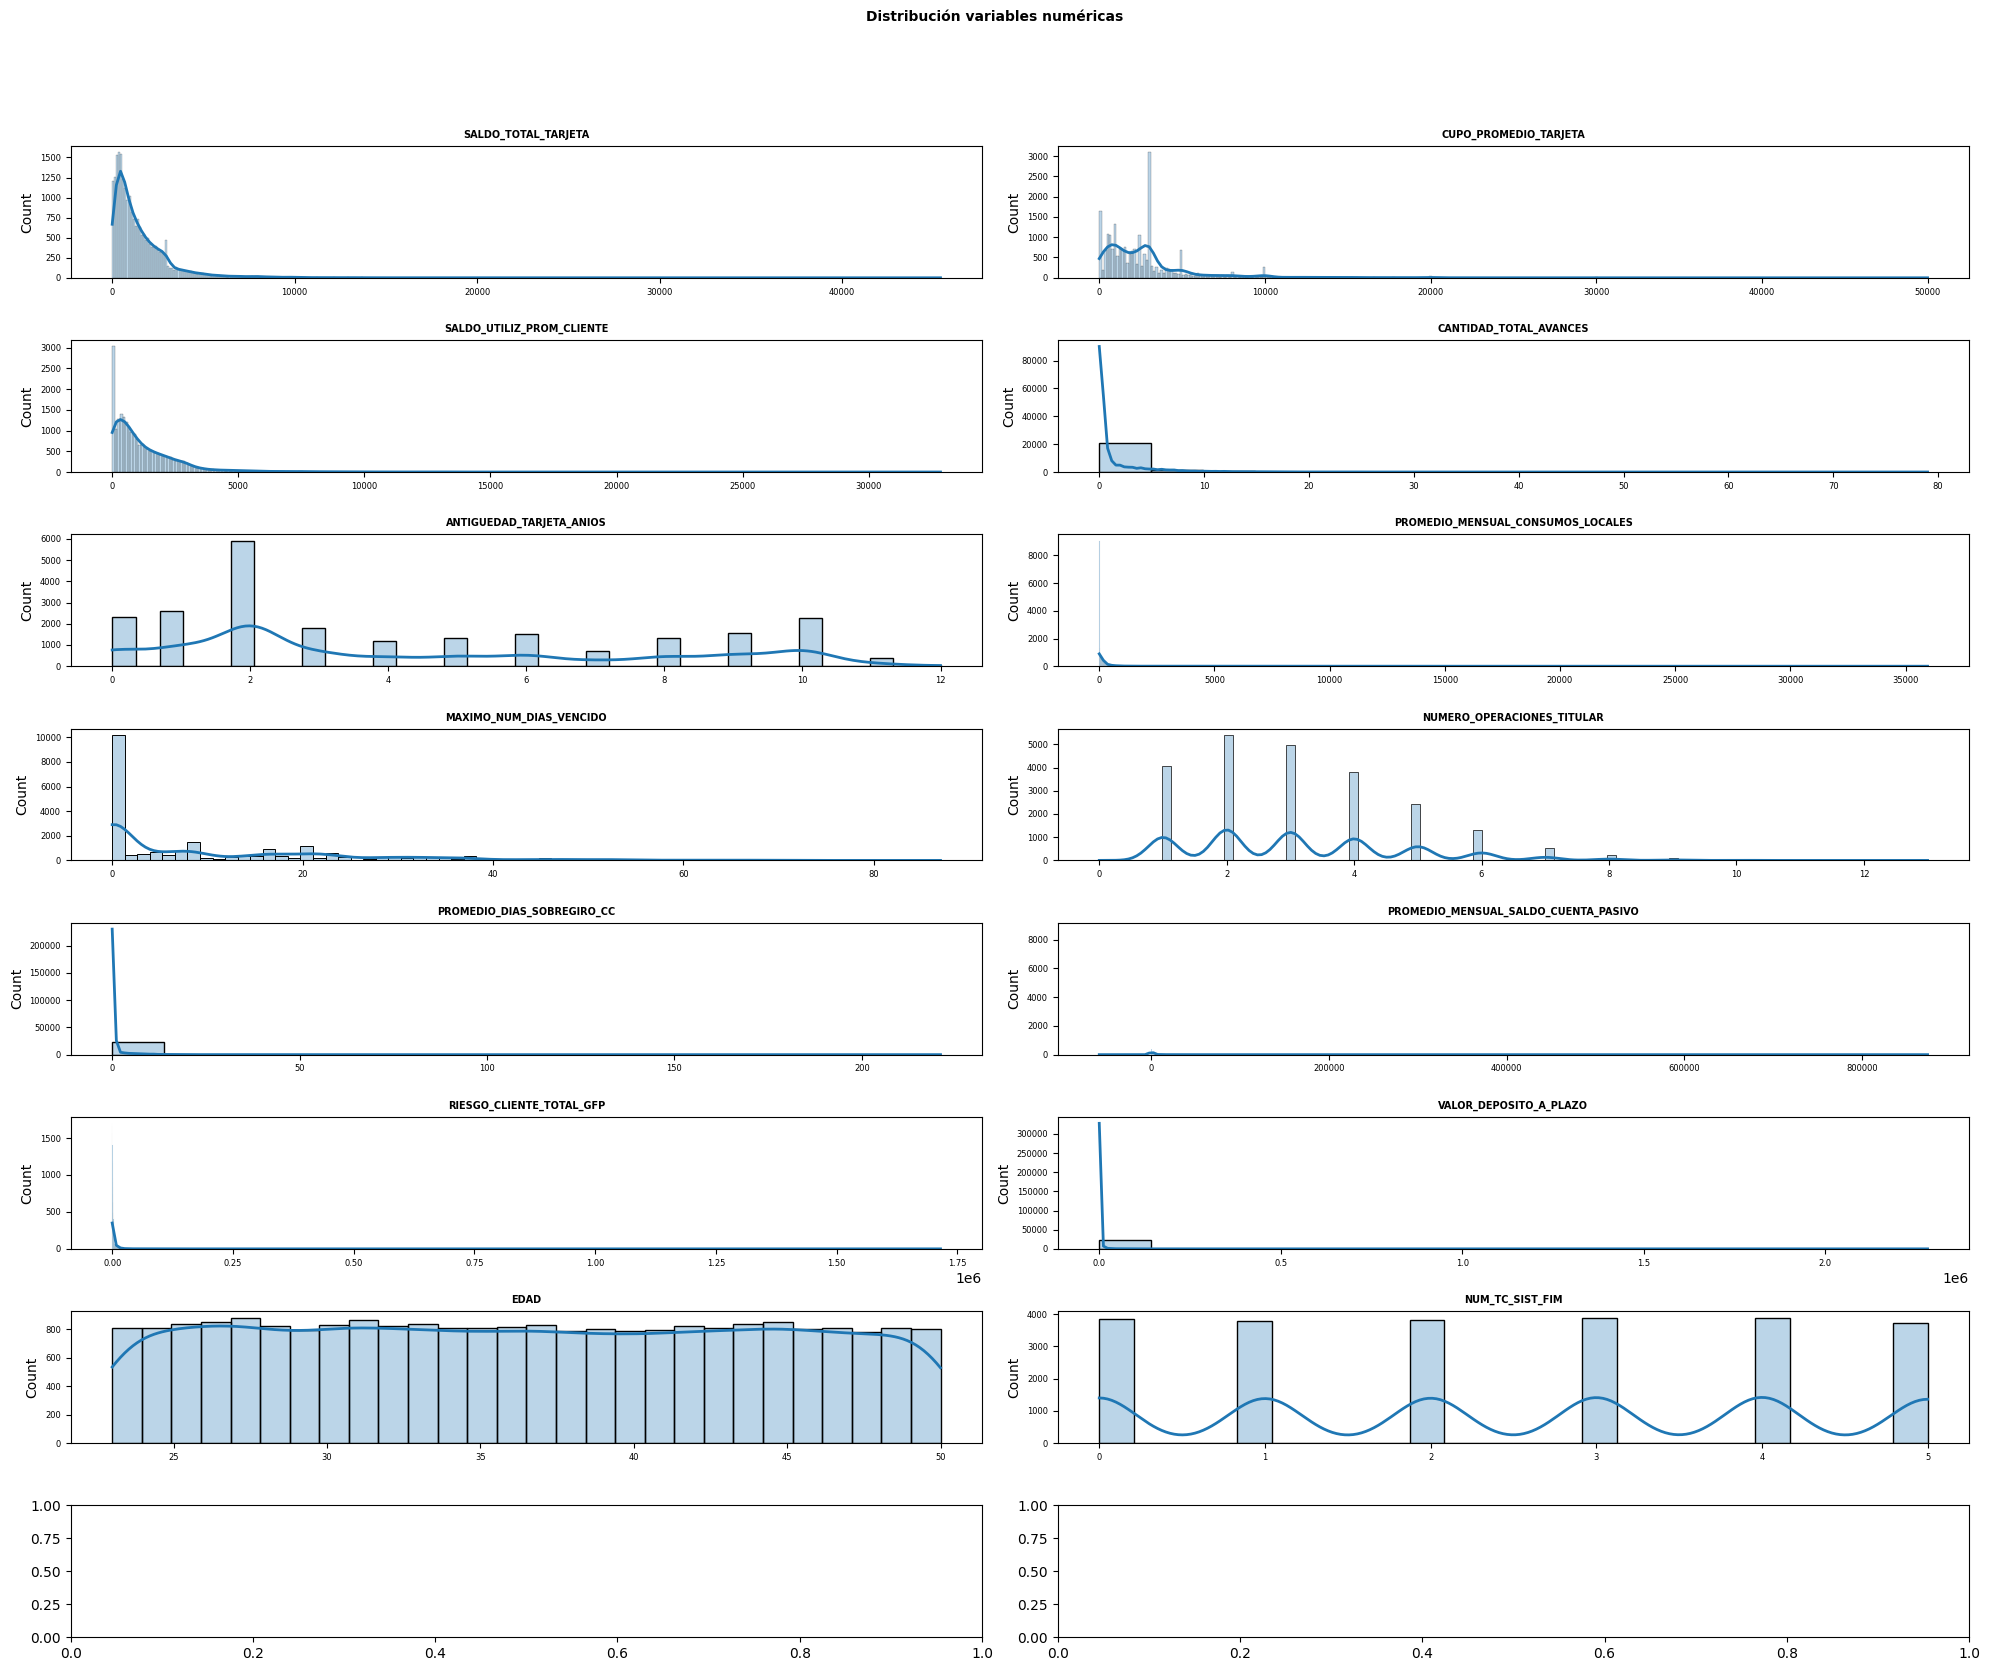

In [16]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 17))
axes = axes.flat
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(col_num):
    sns.histplot(
        data     = data_limpia[col_num+['MarcaMora_Tarjeta']],
        x        = colum,
        #hue      = 'MarcaMora_Tarjeta',
        kde      = True,
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

- Hay un rango grande en las variebles que consideran cantidades de dinero, es normal que algunos clientes muevan grandes cantidades de diner.
- Serecomienda usar un modelo que sea inherente a los datos atípicos por ejemplo: Random Forest. 
- El salfo total de la tarjeta se encuentra en su mayoria contenido, en un rango de 0 a 1000
- De igual forma se con saldo total promedio 

<Axes: >

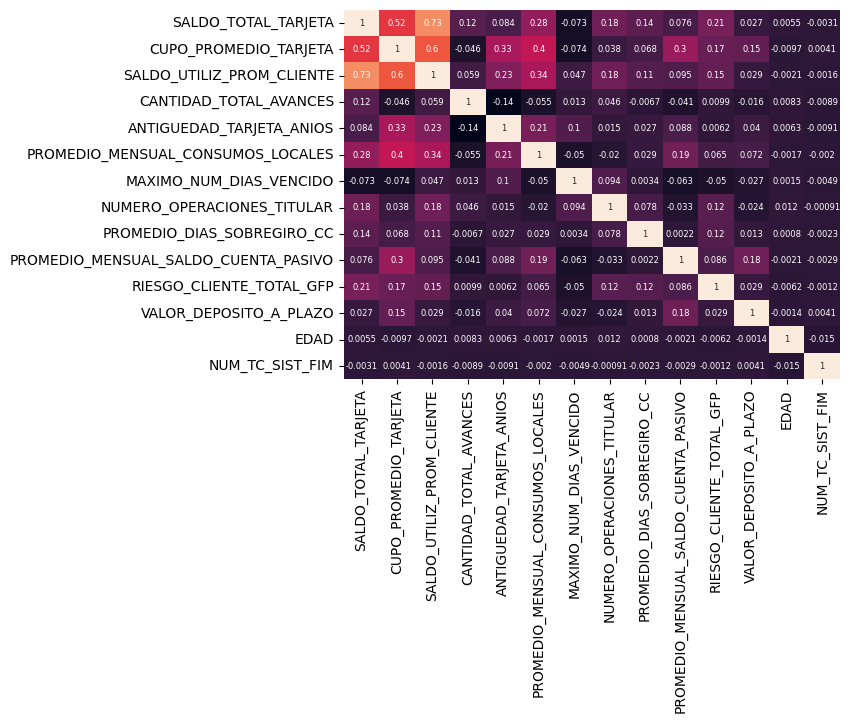

In [27]:
eda_corr=eda_num.corr()
sns.heatmap(eda_corr, 
            annot=True,
            cbar=False,
            annot_kws = {"size": 6},
            # vmin      = -1,
            # vmax      = 1,
            # center    = 0
            )


- Hay una correlación entre el Saldo promedio usado y el Saldo total de tarjetas de crédito. Las dos dependen de un mismo valor. 
- Para nuestro modelo usaremos el Saldo promedio usado en los seis últimos meses, obtenemos un omportamiento más amplio del cliente. 

Text(0.5, 0.98, 'Distribución variables numéricas')

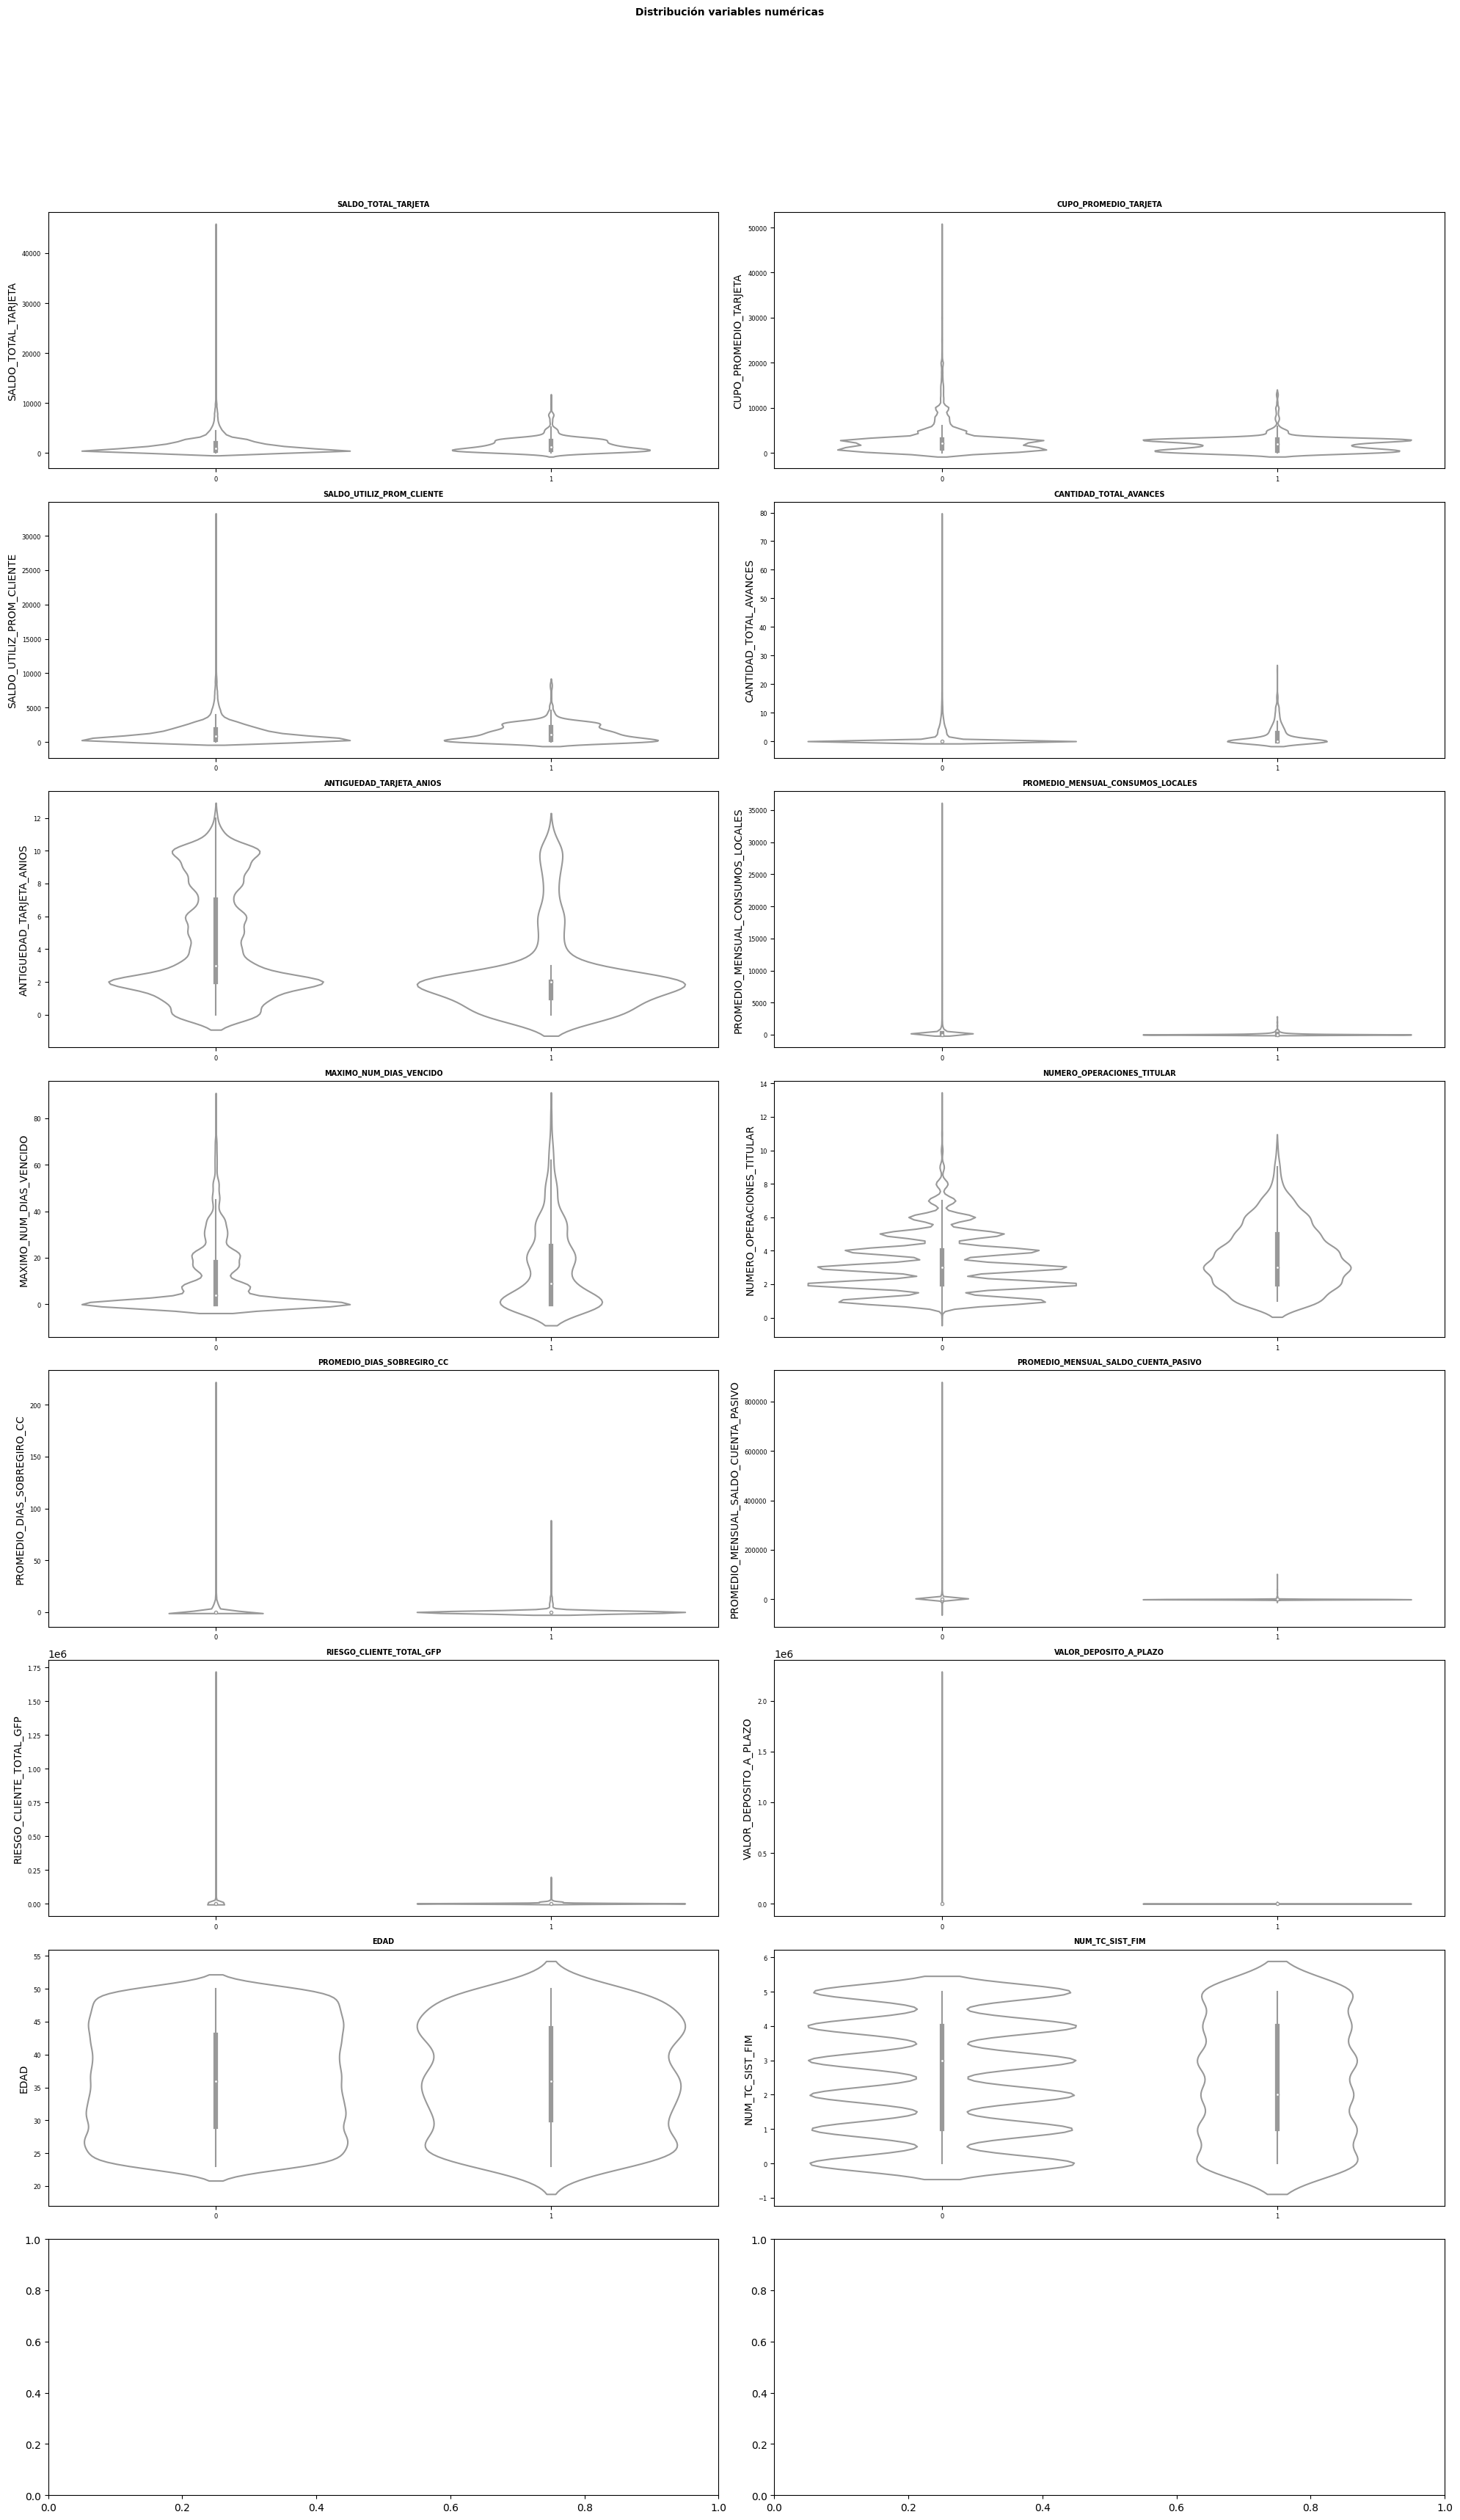

In [31]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 35))
axes = axes.flat
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(col_num):
    sns.violinplot(
        data     = data_limpia[col_num+['MarcaMora_Tarjeta']],
        x        = 'MarcaMora_Tarjeta',
        y      = colum,
        color = "white",
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

- Se puede evidenciar que hay existencia de datos atípicos, en ambos casos cuando cae en Mora y cuando No. 
- Tenemos que analizar un modelo que nos permita manjear los datos atípicos que hay. en ambas clases cuando cae en mora.

In [17]:
eda_cat=data_limpia[col_cat]

Text(0.5, 0.98, 'Distribución variables numéricas')

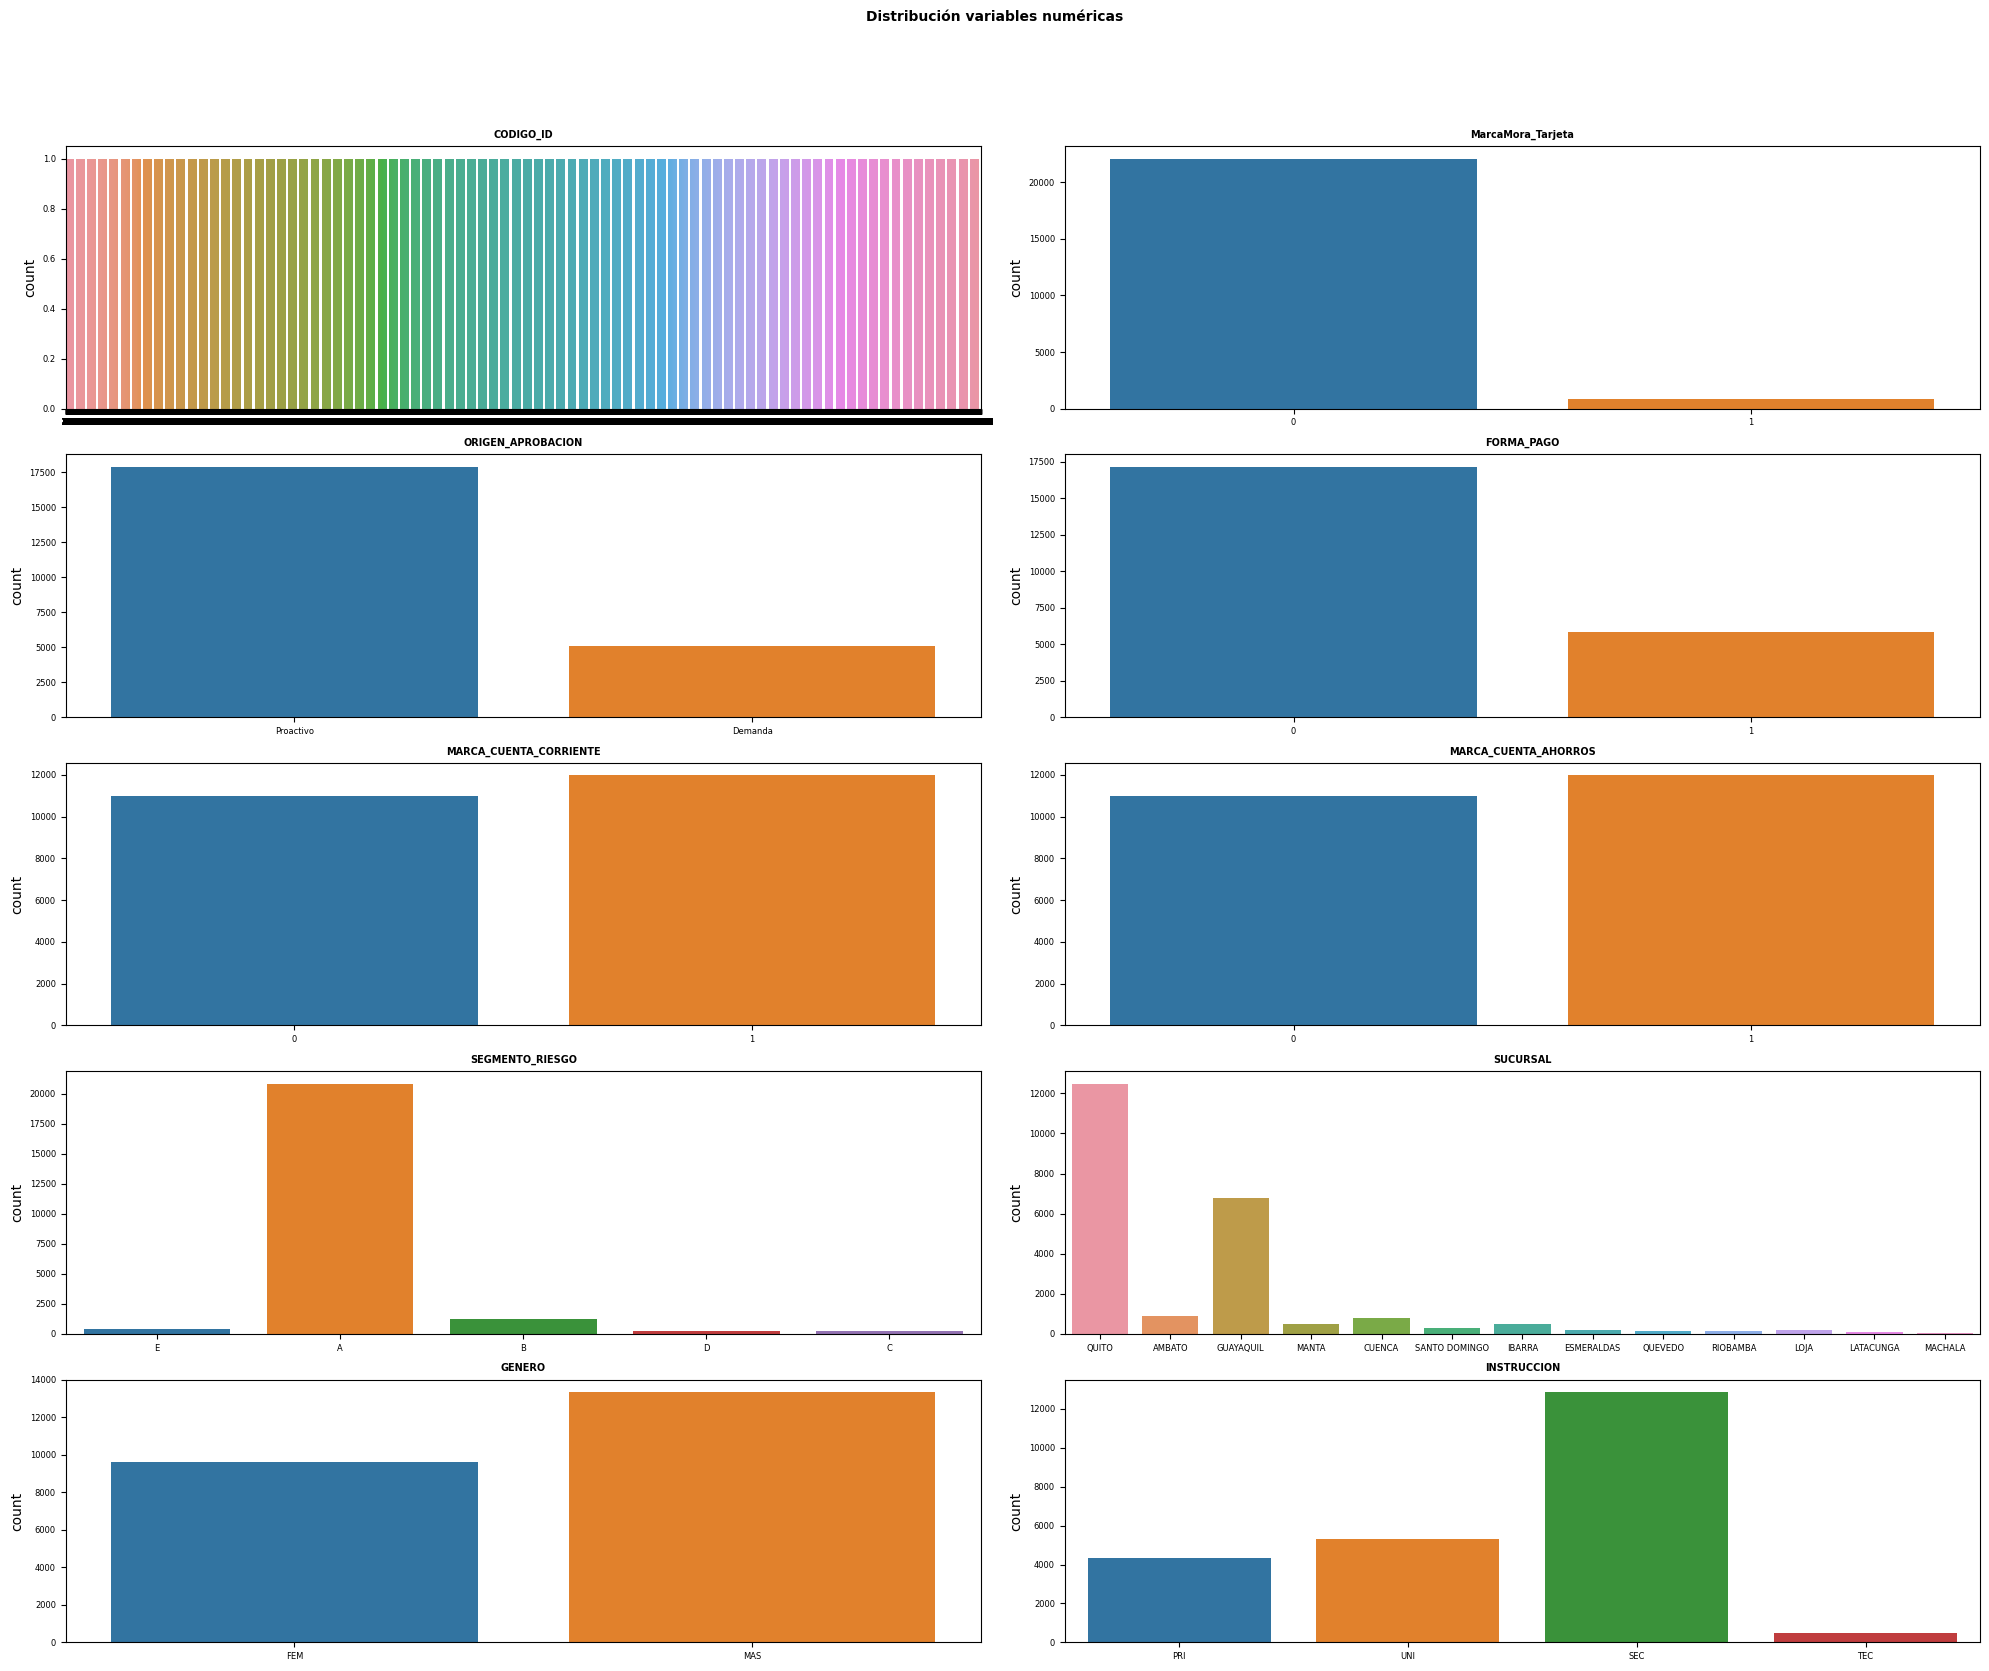

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 17))
axes = axes.flat
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(col_cat):
    sns.countplot(
        data     = eda_cat,
        x        = colum,
        #hue      = 'MarcaMora_Tarjeta',
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

- Existen una clase desbalanceada para la variable objetivo Marca Mora Tarjeta, lo mejor es balancear la data a favor de 0.

# Modelización

In [10]:
import sys
sys.path.append('../src/data')
from train_data import Train_data 

In [11]:
import sys
sys.path.append('../src/models')
from model import ModelTrainer 

## Random Forest

In [18]:
df_model=Train_data("../data/raw/BasePruebaAval.txt")
df_model.read_data()
## Limpiamos la data , el tipo de datos y reemplazamos si por 1 y no por 0
df_model.clean_data()
#E Eliminamos las columnas que no nos sirven para modelado
df_model.delete_col('Fecha')
df_model.delete_col('CODIGO_ID')
df_model.delete_col('SALDO_TOTAL_TARJETA')
df_model.delete_col('GENERO')

## Creamos un encoding para las categorias 
df_model.one_hot_encoding()
#df_model.save_cat('../data/output/cat.npy')
## Eliminamos una columna de los encoding realizdos para evitar la multicolinealidad
df_model.delete_col('INSTRUCCION_TEC')
df_model.delete_col('SUCURSAL_MACHALA')
df_model.delete_col('SEGMENTO_RIESGO_C')

# x.save_cat('./data/output/cat.csv')
# Despues de seleccionar y elminar las variables exportamos los nombres de las variables que entran al modelo
df_model.save_cat('../data/output/cat.csv')

## Particionamos la data en entrenamiento y testing 
df_model.split_X_y('MarcaMora_Tarjeta')
df_model.split_data()
x_model_test=df_model.X_test
y_model_test=df_model.y_test
## Balanceamos la data a favor de la clase mas pequena 
df_model.balanced_over()
x_model=df_model.X_resampled#.sample(5000)
y_model=df_model.y_resampled#.sample(5000)
#print(df_model.y_resampled.value_counts())

- vamos a correr un modelo de random forest, con tuneo de los hiperparametros para escoger la mejor configuración del modelo
- Hemos escogido el modelo de Random forest porque tenemos muchos datos atípicos en el caso de valores que incluyan el dinero 

In [19]:
x_model.columns

Index(['ORIGEN_APROBACION', 'FORMA_PAGO', 'CUPO_PROMEDIO_TARJETA',
       'SALDO_UTILIZ_PROM_CLIENTE', 'CANTIDAD_TOTAL_AVANCES',
       'ANTIGUEDAD_TARJETA_ANIOS', 'PROMEDIO_MENSUAL_CONSUMOS_LOCALES',
       'MAXIMO_NUM_DIAS_VENCIDO', 'NUMERO_OPERACIONES_TITULAR',
       'PROMEDIO_DIAS_SOBREGIRO_CC', 'PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO',
       'MARCA_CUENTA_CORRIENTE', 'MARCA_CUENTA_AHORROS',
       'RIESGO_CLIENTE_TOTAL_GFP', 'VALOR_DEPOSITO_A_PLAZO', 'EDAD',
       'NUM_TC_SIST_FIM', 'SEGMENTO_RIESGO_A', 'SEGMENTO_RIESGO_B',
       'SEGMENTO_RIESGO_D', 'SEGMENTO_RIESGO_E', 'SUCURSAL_AMBATO',
       'SUCURSAL_CUENCA', 'SUCURSAL_ESMERALDAS', 'SUCURSAL_GUAYAQUIL',
       'SUCURSAL_IBARRA', 'SUCURSAL_LATACUNGA', 'SUCURSAL_LOJA',
       'SUCURSAL_MANTA', 'SUCURSAL_QUEVEDO', 'SUCURSAL_QUITO',
       'SUCURSAL_RIOBAMBA', 'SUCURSAL_SANTO DOMINGO', 'INSTRUCCION_PRI',
       'INSTRUCCION_SEC', 'INSTRUCCION_UNI'],
      dtype='object')

- Hemos hecho un encoding de las variables categorias y evitar la multicolinealidad

In [20]:
x_model.dtypes

ORIGEN_APROBACION                         int64
FORMA_PAGO                                int64
CUPO_PROMEDIO_TARJETA                   float64
SALDO_UTILIZ_PROM_CLIENTE               float64
CANTIDAD_TOTAL_AVANCES                  float64
ANTIGUEDAD_TARJETA_ANIOS                float64
PROMEDIO_MENSUAL_CONSUMOS_LOCALES       float64
MAXIMO_NUM_DIAS_VENCIDO                 float64
NUMERO_OPERACIONES_TITULAR              float64
PROMEDIO_DIAS_SOBREGIRO_CC              float64
PROMEDIO_MENSUAL_SALDO_CUENTA_PASIVO    float64
MARCA_CUENTA_CORRIENTE                    int64
MARCA_CUENTA_AHORROS                      int64
RIESGO_CLIENTE_TOTAL_GFP                float64
VALOR_DEPOSITO_A_PLAZO                  float64
EDAD                                    float64
NUM_TC_SIST_FIM                         float64
SEGMENTO_RIESGO_A                         uint8
SEGMENTO_RIESGO_B                         uint8
SEGMENTO_RIESGO_D                         uint8
SEGMENTO_RIESGO_E                       

In [21]:
x_model

,ORIGEN_APROBACION,FORMA_PAGO,CUPO_PROMEDIO_TARJETA,SALDO_UTILIZ_PROM_CLIENTE,CANTIDAD_TOTAL_AVANCES,ANTIGUEDAD_TARJETA_ANIOS,PROMEDIO_MENSUAL_CONSUMOS_LOCALES,MAXIMO_NUM_DIAS_VENCIDO,NUMERO_OPERACIONES_TITULAR,PROMEDIO_DIAS_SOBREGIRO_CC,...,SUCURSAL_LATACUNGA,SUCURSAL_LOJA,SUCURSAL_MANTA,SUCURSAL_QUEVEDO,SUCURSAL_QUITO,SUCURSAL_RIOBAMBA,SUCURSAL_SANTO DOMINGO,INSTRUCCION_PRI,INSTRUCCION_SEC,INSTRUCCION_UNI
0,0,1,10000.0000,1522.9233,0.0,9.0,0.00,15.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,466.6666,296.9250,0.0,4.0,0.00,17.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,2800.0000,425.4250,0.0,10.0,220.07,31.0,3.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,900.0000,169.9900,0.0,7.0,56.87,2.0,4.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,5000.0000,4139.9583,0.0,2.0,0.00,46.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391,1,0,3000.0000,2268.0900,15.0,3.0,48.96,31.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
35392,1,1,0.0000,0.0000,1.0,0.0,0.00,0.0,7.0,0.0,...,0,0,0,0,0,0,0,1,0,0
35393,0,0,2700.0000,1960.3883,0.0,5.0,147.28,19.0,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
35394,1,0,3000.0000,2633.0016,0.0,1.0,0.00,21.0,5.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
y_model

0        0
1        0
2        0
3        0
4        0
        ..
35391    1
35392    1
35393    1
35394    1
35395    1
Name: MarcaMora_Tarjeta, Length: 35396, dtype: int64

In [23]:

model_trainer = ModelTrainer(x_model, y_model)
best_model, grid_results = model_trainer.train_with_grid_search()



In [24]:
print("Mejor modelo:")
print(best_model)

Mejor modelo:
RandomForestClassifier(max_features=5, n_estimators=99, random_state=123)


In [25]:
y_predict = best_model.predict(x_model_test)

In [26]:
## métricas de Evaluación

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
mat_confusion = confusion_matrix(
                    y_true    = y_model_test,
                    y_pred    = y_predict
                )

accuracy = accuracy_score(
            y_true    = y_model_test,
            y_pred    = y_predict,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[4396    6]
 [ 186    5]]

El accuracy de test es: 95.81972566949706 %


In [29]:
print(
    classification_report(
        y_true = y_model_test,
        y_pred = y_predict
    )
)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4402
           1       0.45      0.03      0.05       191

    accuracy                           0.96      4593
   macro avg       0.71      0.51      0.51      4593
weighted avg       0.94      0.96      0.94      4593



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

In [31]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

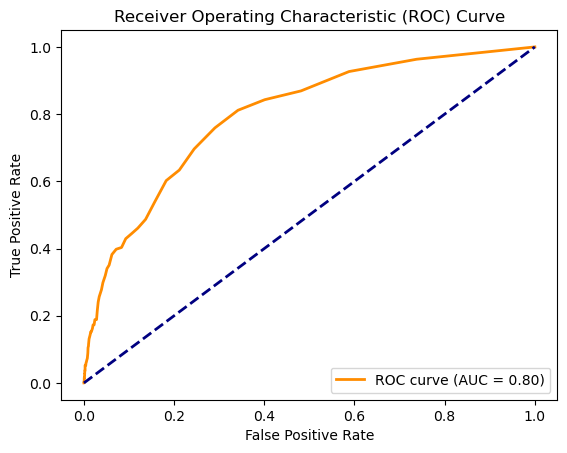

In [32]:
y_predict = best_model.predict_proba(x_model_test)[:,1]

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para varios umbrales de probabilidad
fpr, tpr, thresholds = roc_curve(y_model_test, y_predict)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Exportamos el modelo 

In [33]:
model_filename = '../model/modelo_entrenado.joblib'
joblib.dump(best_model, model_filename)
print(f"Modelo exportado como '{model_filename}'")

Modelo exportado como '../model/modelo_entrenado.joblib'
